# Visualizing LDA Clusters

It can be challenging to evaluate a model trained with Unsupervised Learning. There are no ground truth labels. The learned topics aren't "right" or "wrong". The questions is, are the topics useful? 

In this notebook you will visualize the results from your topic modeling in several different ways and reflect on how you can evaluate an Unsupervised Learning algorithm. 

## Imports

In [1]:
import sys
import wordcloud
import numpy as np
import matplotlib.pyplot as plt

''' import project files '''
from data import *
from models import *

In [2]:
data_dir = "./datasets/"
# note: you can change the dataset here
dataset = "cb/" 

In [3]:
X_sparse, vocab = build_dtm(data_dir+dataset, num_docs=100)
X = X_sparse.toarray()

## Getting Started: Understanding the Data
Throughout this course, we have emphasized that an important step in ML algorithm development is understanding your data. We have provided the document-word matrix $X$. $X$ is of size num-documents by num-words. You can verify this by looking at the length of vocab and how many documents are in the dataset folder you selected. The entries in $X$ must be integers, element $X[i, j]$ is the count of how many times word $j$ occured in document $i$.

<IPython.core.display.Javascript object>


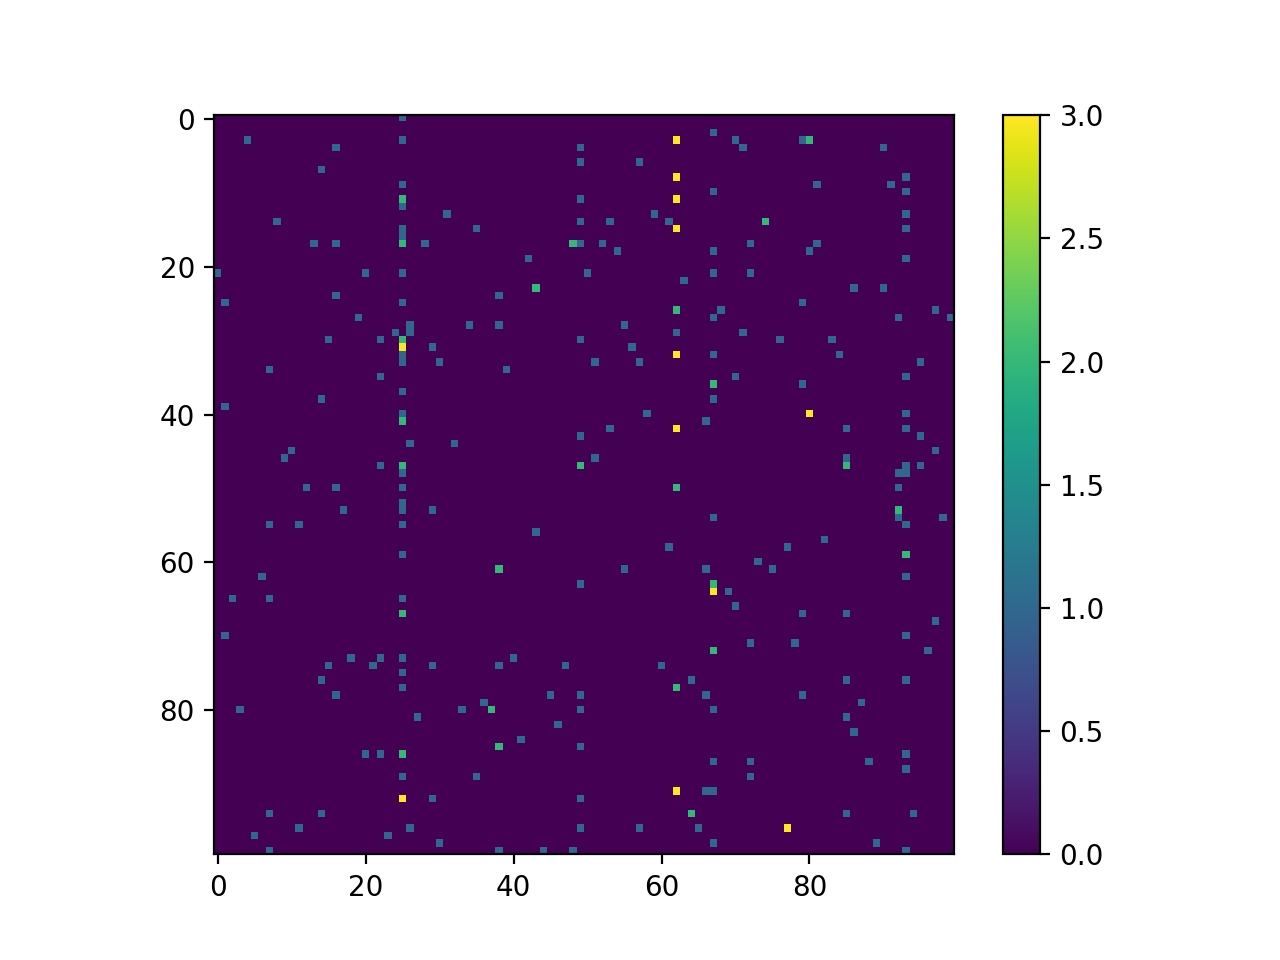

In [4]:
%matplotlib notebook
fig = plt.figure()
plt.imshow(X[0:100, 0:100], vmin=0, vmax=3)
plt.colorbar()
plt.show()

Here we visualize a small portion of $X$. Note that most entries are zero, indicating that the specified vocab word is absent from that document. 

### What words occur most frequently in our dataset? 
To find the total number of occurances of each word in the dataset, we sum each column. 

In [5]:
word_counts = np.sum(X, axis=0)

In [6]:
sorted_words   = np.sort(word_counts)
sorted_indices = np.argsort(word_counts)

<IPython.core.display.Javascript object>


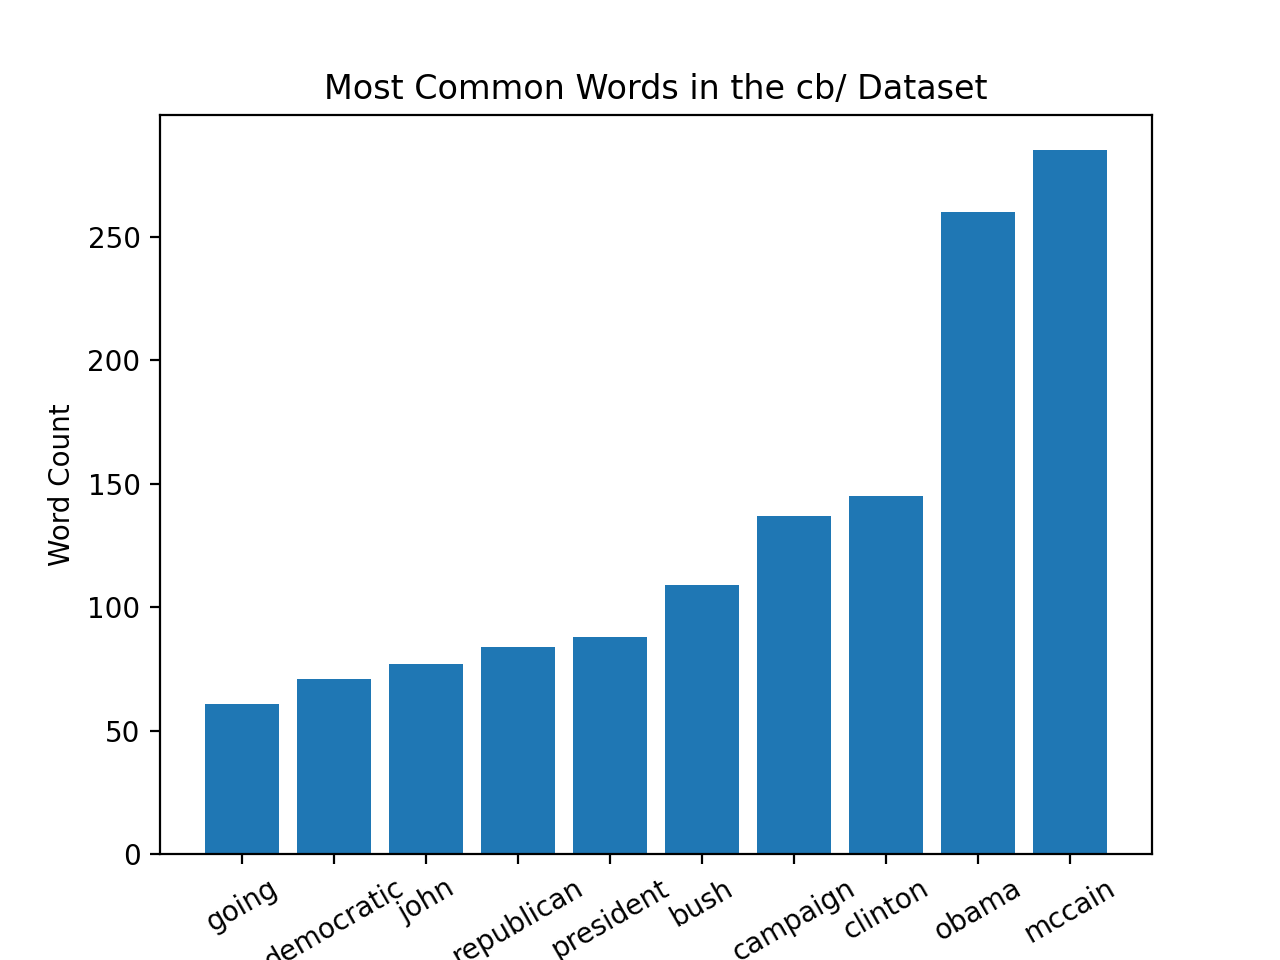

In [7]:
W = len(vocab)
''' Visualize the 10 most frequently used words in our dataset '''
fig = plt.figure()
plt.bar(range(10), sorted_words[W-10:W])
plt.xticks(range(10), list(vocab[sorted_indices[W-10:W]]), rotation=30)
plt.ylabel('Word Count')
plt.xlabel('Word')
plt.title("Most Common Words in the " + dataset +" Dataset")
plt.show()

## Evaluating Your Results
In this section we have provided code to visualize the learned topics in several ways. At the end of the notebook, you will reflect on your model and describe which visualization techniques were helpful and which were not. We have included text throughout to help walk you through the different visualizations. <br>
<b>The questions you need to answer for credit are at the very end and are labeled 'Evaluation Questions'.</b>

In [8]:
''' running our code '''
inference_type  = 'gibbs_sampling' # or 'sum_product'
num_topics = 10
alpha = 0.1
beta = 0.01

In [9]:
# build the appropriate model
if inference_type == 'gibbs_sampling':
    inference = GibbsSampling(num_topics=num_topics, num_docs=X.shape[0], 
        num_words=X.shape[1], alpha=alpha, beta=beta)
elif inference_type == 'sum_product':
    inference = SumProduct(num_topics=num_topics, num_docs=X.shape[0], 
        num_words=X.shape[1], num_nonzero=X_sparse.nnz, alpha=alpha, beta=beta)
else:
    raise Exception('The model given by --model is not yet supported.')

# Run the training loop
model = LDA(inference=inference)
model.fit(X=X_sparse, iterations=50)

data [1 7 2 ... 1 1 1] (14119,) <class 'numpy.ndarray'> hello?
iteration 1 -152504.11307168534
iteration 2 -196604.8424069633
iteration 3 -257574.04378549344
iteration 4 -325684.892068199
iteration 5 -396672.14327106334
iteration 6 -469549.378277111
iteration 7 -543971.1183441255
iteration 8 -619294.151984589
iteration 9 -695512.2462293428
iteration 10 -772125.7169051346
iteration 11 -849333.8692842518
iteration 12 -927040.4288416905
iteration 13 -1005468.2929649255
iteration 14 -1084150.0605898667
iteration 15 -1162963.3914999978
iteration 16 -1242095.4571776672
iteration 17 -1321550.4496026395
iteration 18 -1401239.3850199946
iteration 19 -1481272.0834032623
iteration 20 -1561481.5923369967
iteration 21 -1641984.8924132744
iteration 22 -1722797.4847494145
iteration 23 -1803531.8120574492
iteration 24 -1884263.76478592
iteration 25 -1965069.8676400846
iteration 26 -2046114.985161532
iteration 27 -2127020.419705575
iteration 28 -2208192.332493619
iteration 29 -2289496.463689684
iterati

### Below is a plot of the negative log likelihood of your model over the training iterations. The likelihood should be increasing over the iterations. It should be converging by your final iterations. 

<IPython.core.display.Javascript object>


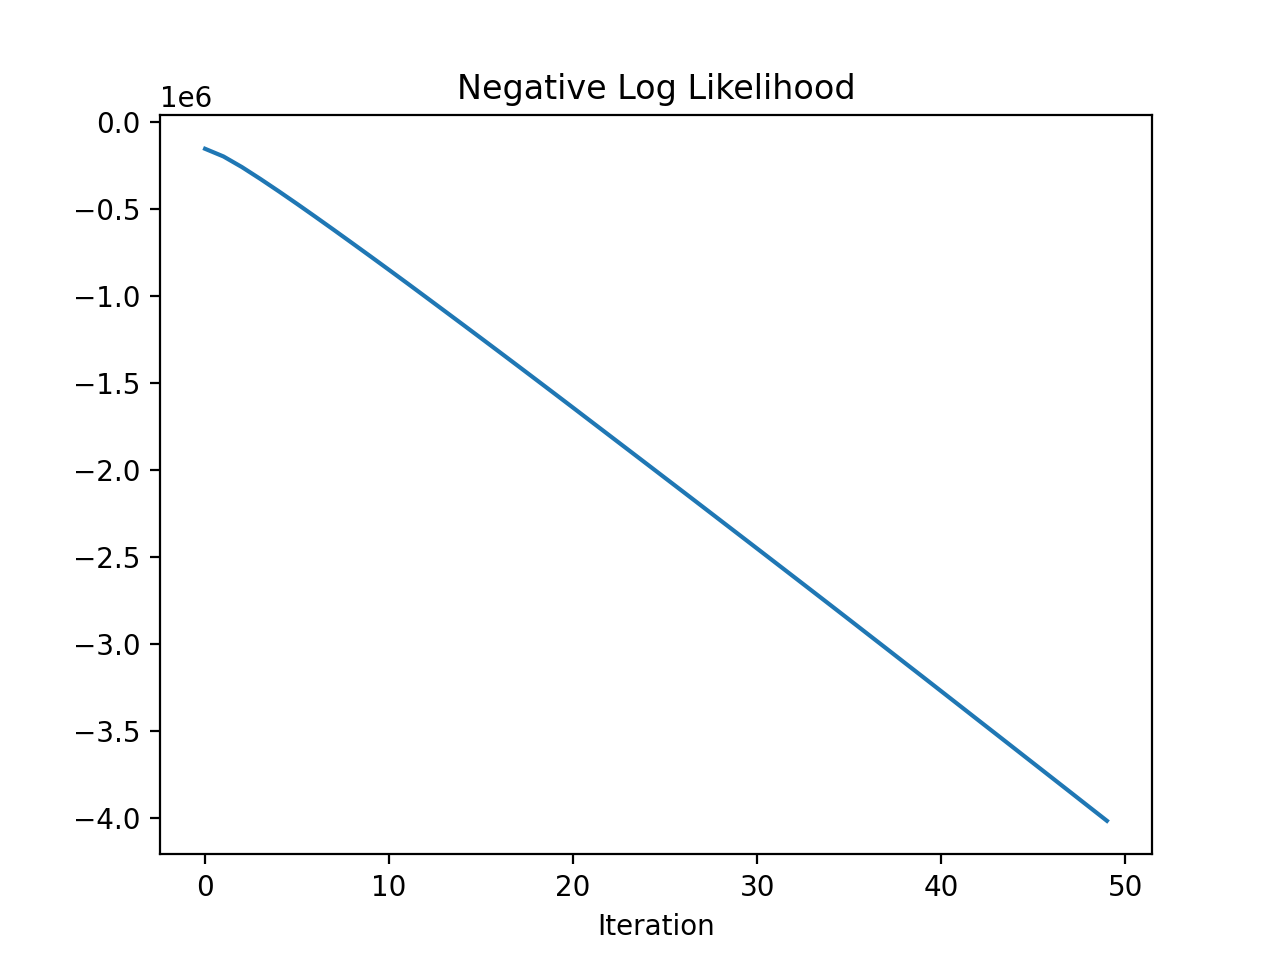

In [10]:
fig = plt.figure()
plt.plot(model.inference.loglikelihoods)
plt.title('Negative Log Likelihood')
plt.xlabel('Iteration')
plt.show()

### Visualization 1
Here we visualize the LDA score given the specified topic for the 10 most frequently used words in our dataset. The higher the score, the more likely the word is in the given topic.

<IPython.core.display.Javascript object>


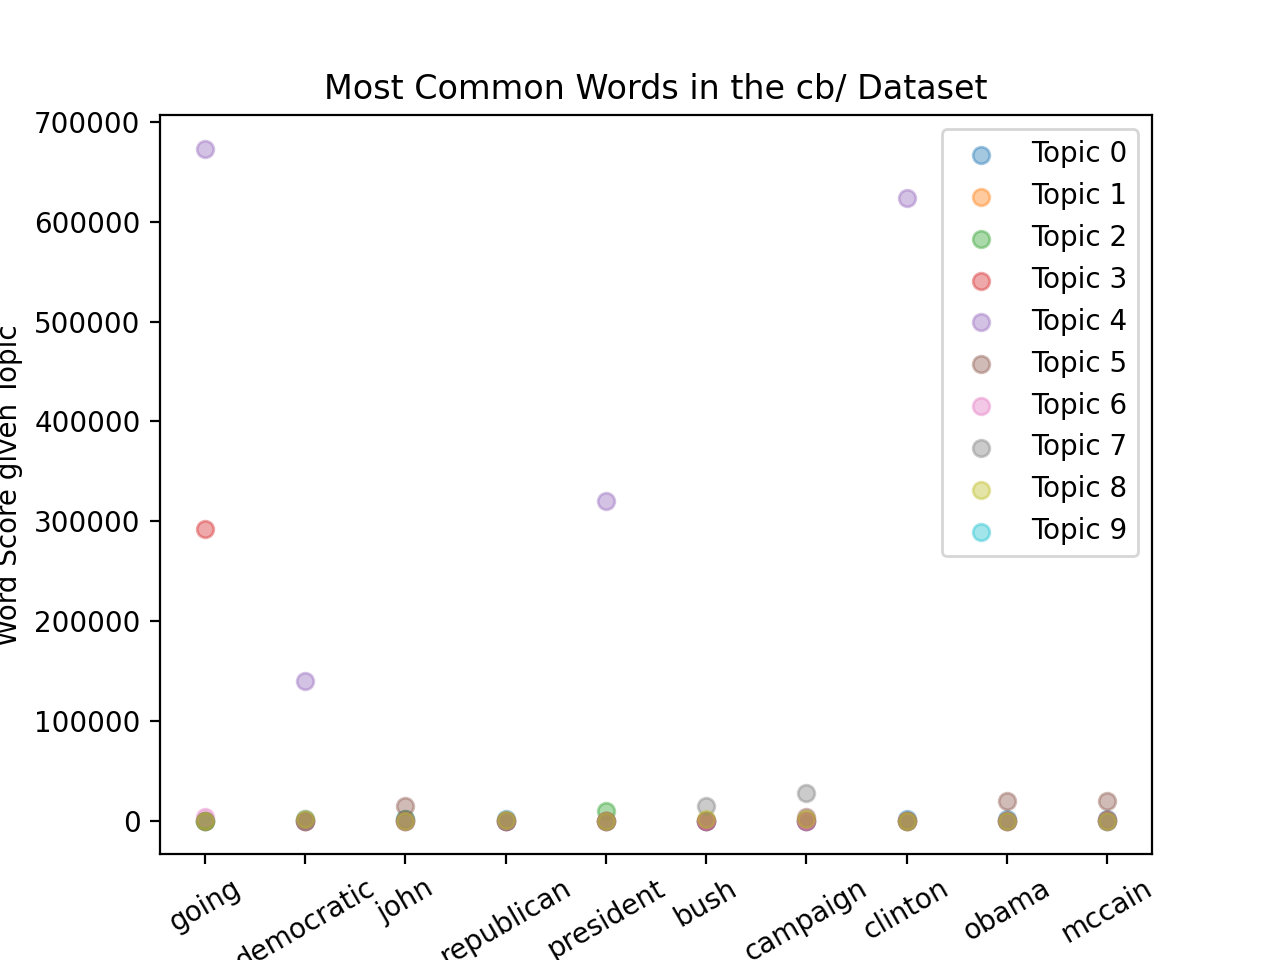

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [11]:
W = len(vocab)
fig = plt.figure()
for i in range(model.inference.num_topics):

    plt.scatter(range(10), model.inference.nzw[i][sorted_indices[W-10:W]]/(model.inference.nz[i]/np.sum(model.inference.nz)), alpha=0.4, label="Topic "+ str(i))  
    
plt.xticks(range(10), list(vocab[sorted_indices[W-10:W]]), rotation=30)
plt.ylabel('Word Score given Topic')
plt.xlabel('Word')
plt.title("Most Common Words in the " + dataset +" Dataset")
plt.legend()
plt.show()

### Visualization 2
Here we print out the top $K$ words associated with each topic. 

In [12]:
K = 5
model.predict(vocab=vocab, K=K)

['Topic 0: mccain presidential republican race policy',
 'Topic 1: point president hard good problem',
 'Topic 2: yesterday white make president ago',
 'Topic 3: ago don barack country sure',
 'Topic 4: going especially clinton national record',
 'Topic 5: obama mccain time john sure',
 'Topic 6: yesterday people told don political',
 'Topic 7: campaign news actually political bush',
 'Topic 8: bush campaign idea voters want',
 'Topic 9: actually point republican campaign press']

### Next we plot the top $K$ words by their score given the topic. 

<IPython.core.display.Javascript object>


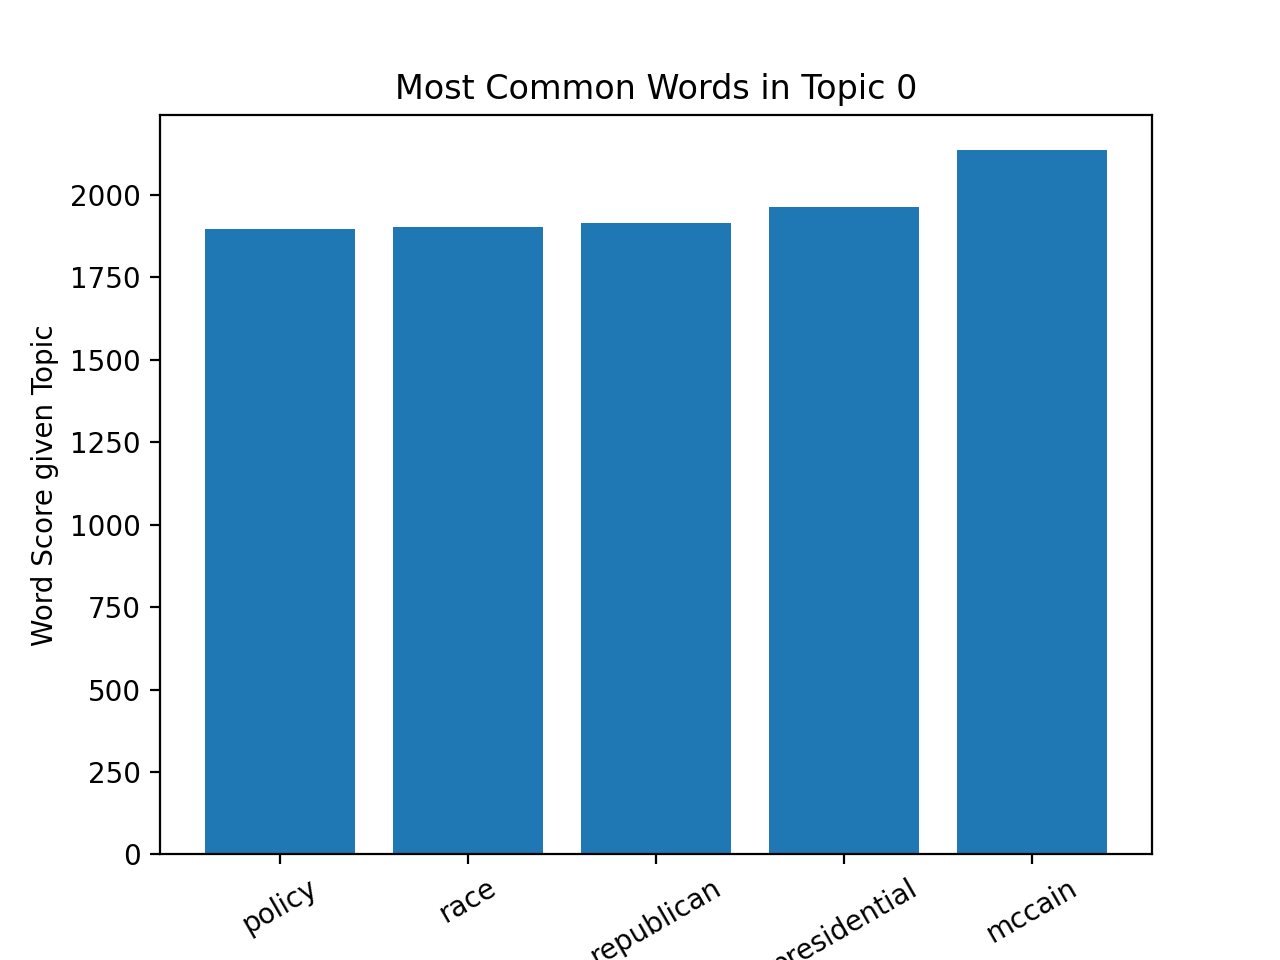

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


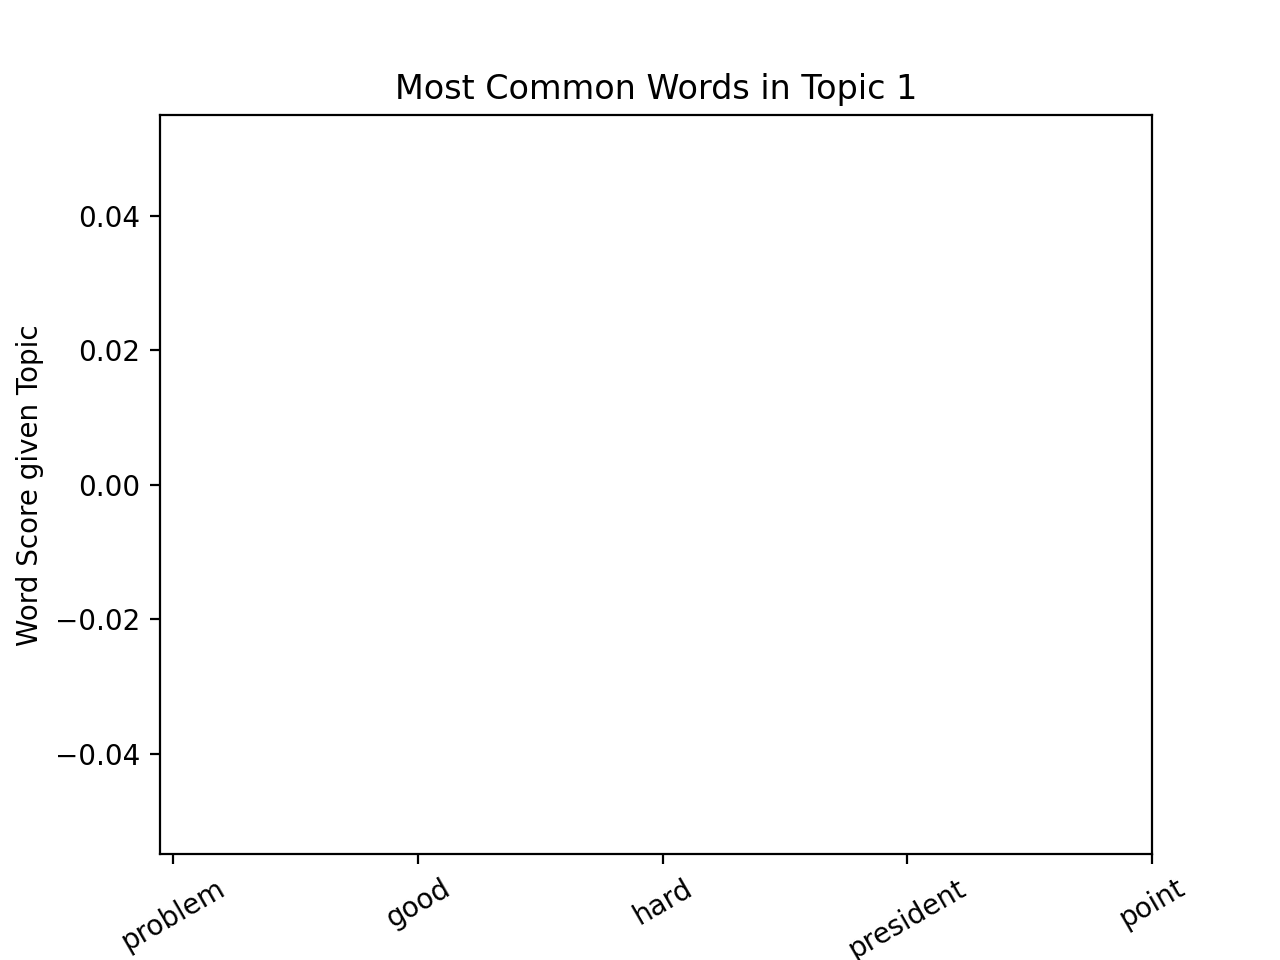

<IPython.core.display.Javascript object>


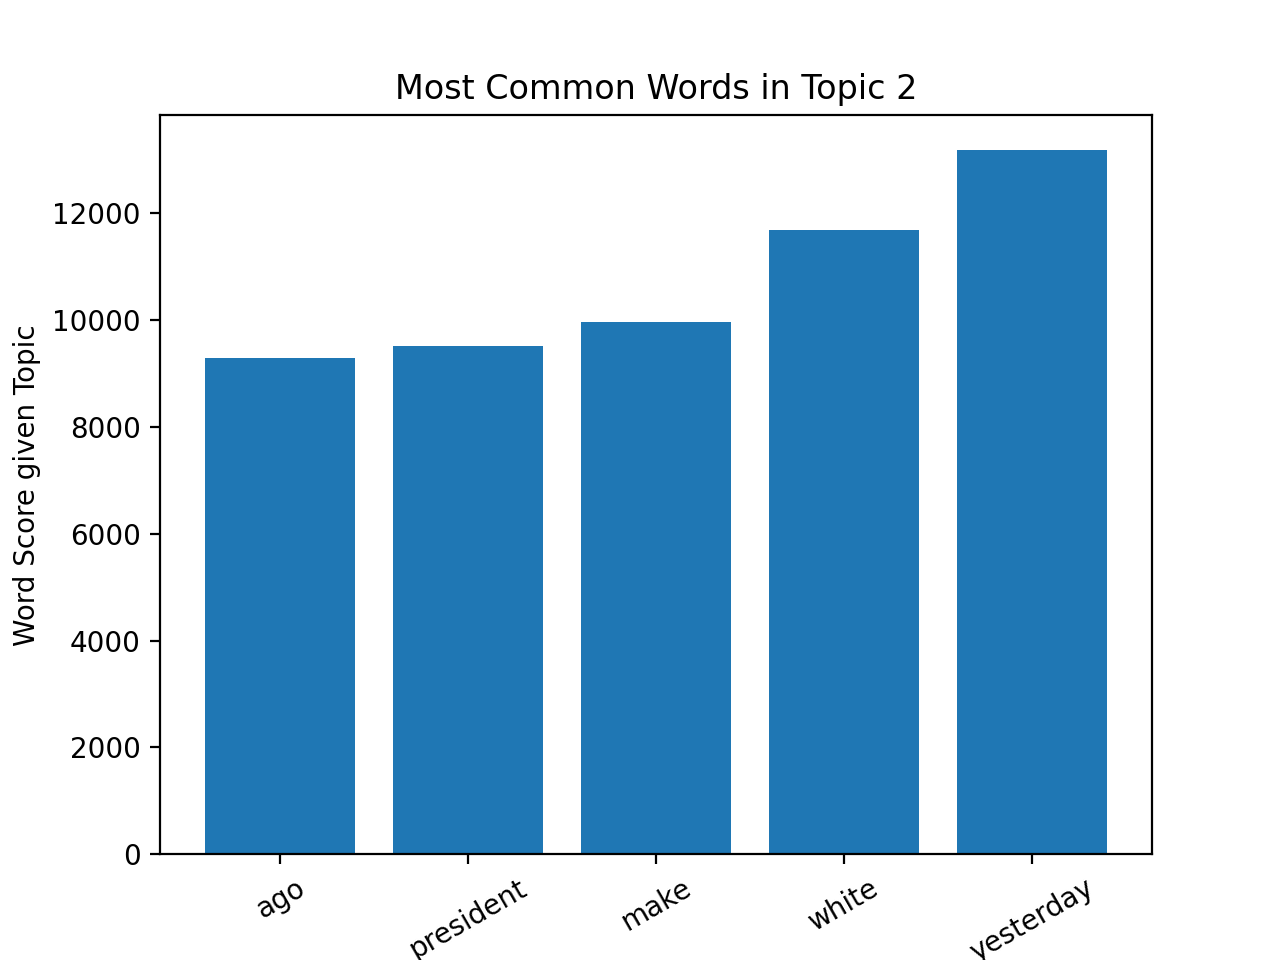

<IPython.core.display.Javascript object>


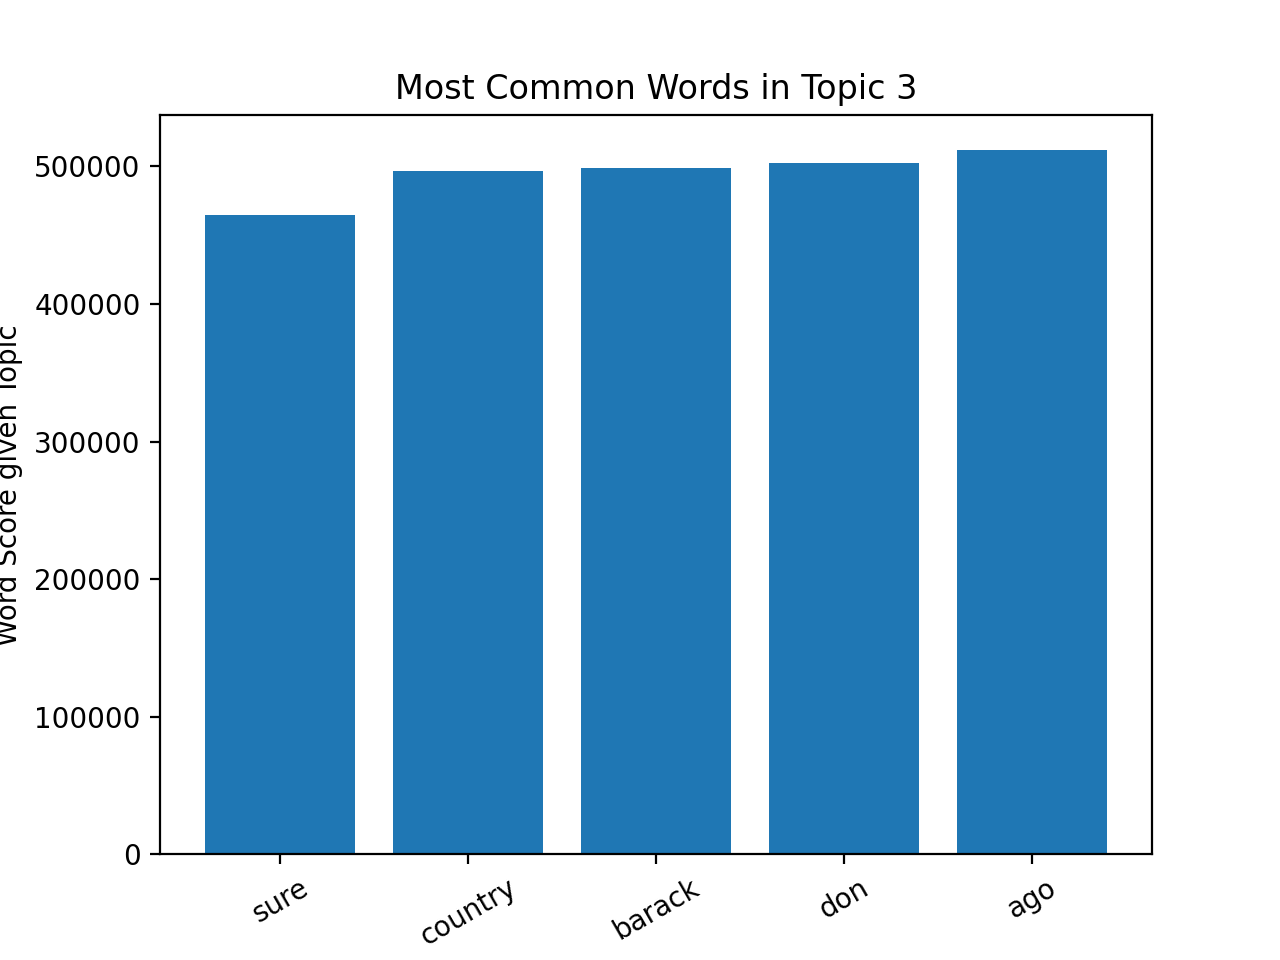

<IPython.core.display.Javascript object>


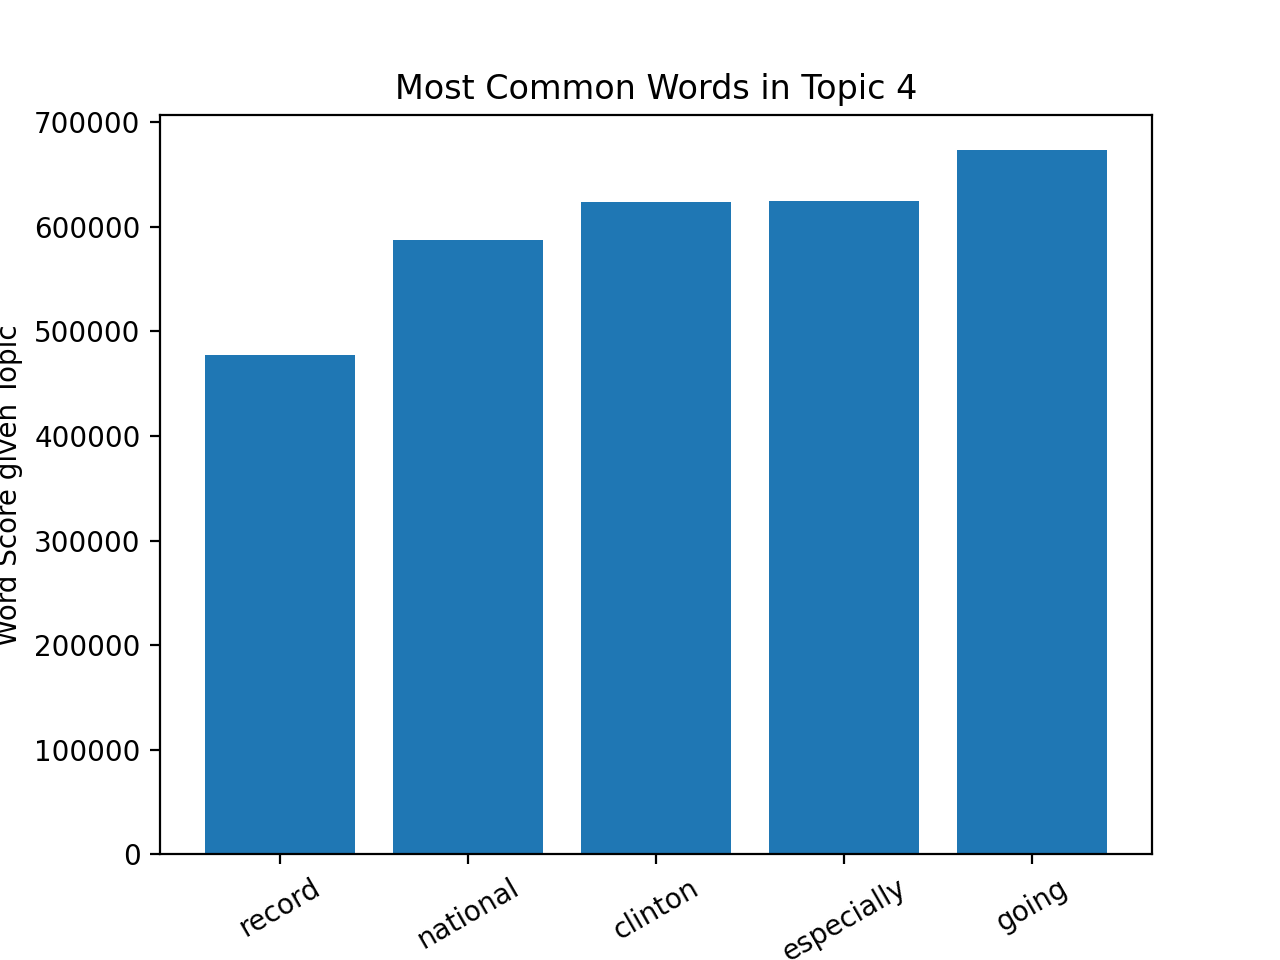

<IPython.core.display.Javascript object>


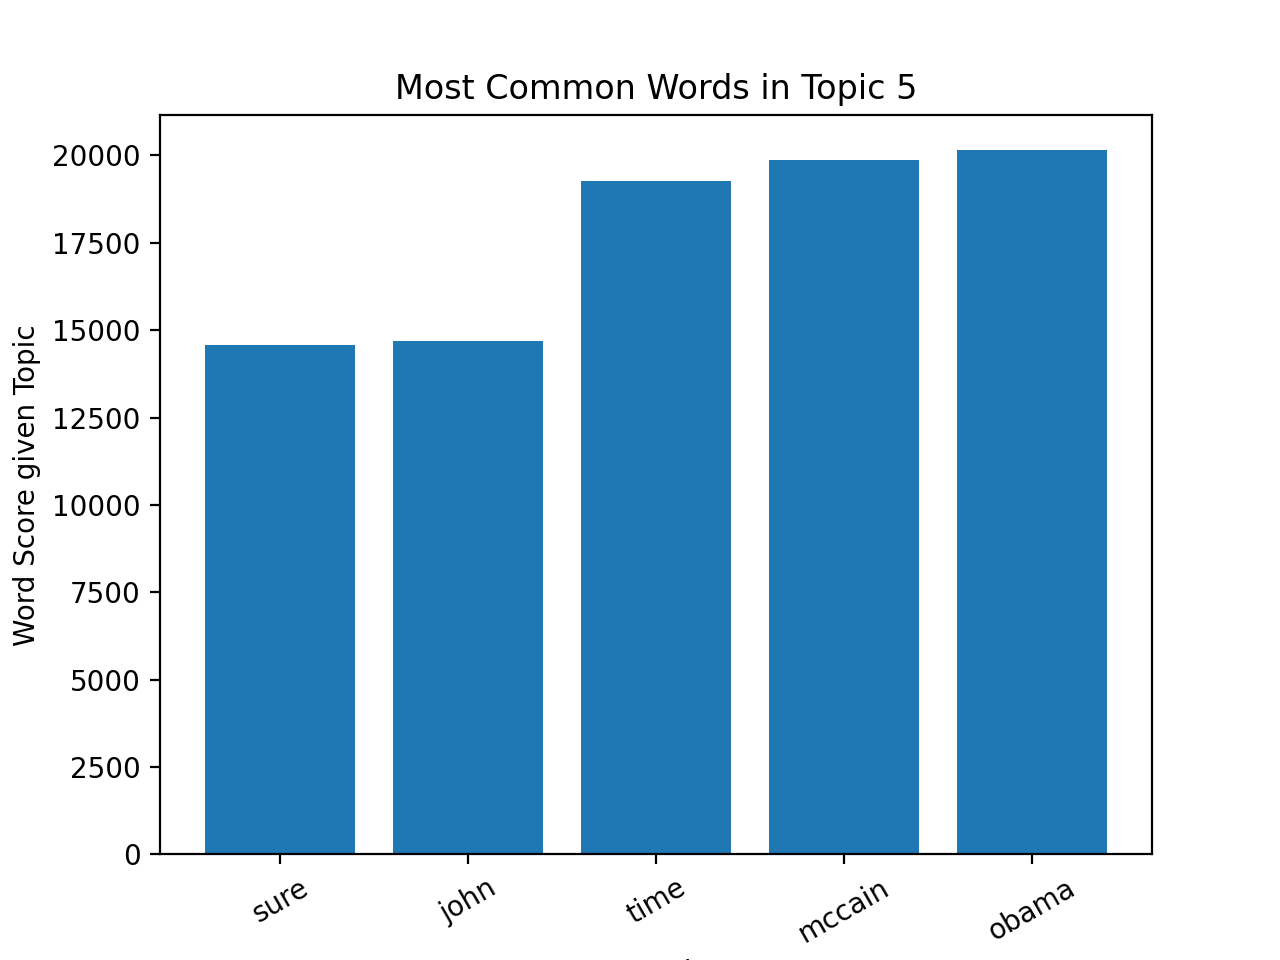

<IPython.core.display.Javascript object>


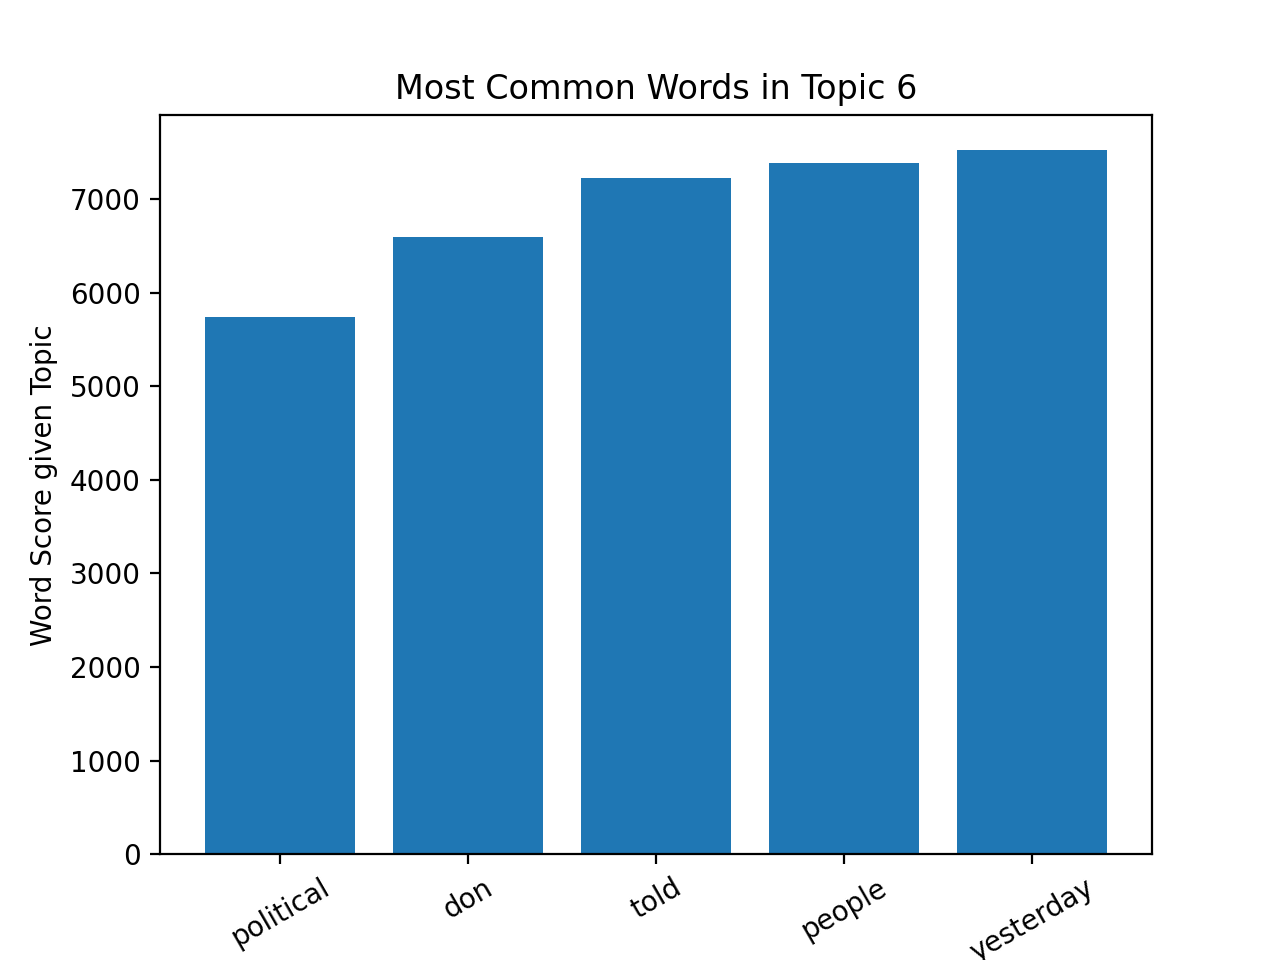

<IPython.core.display.Javascript object>


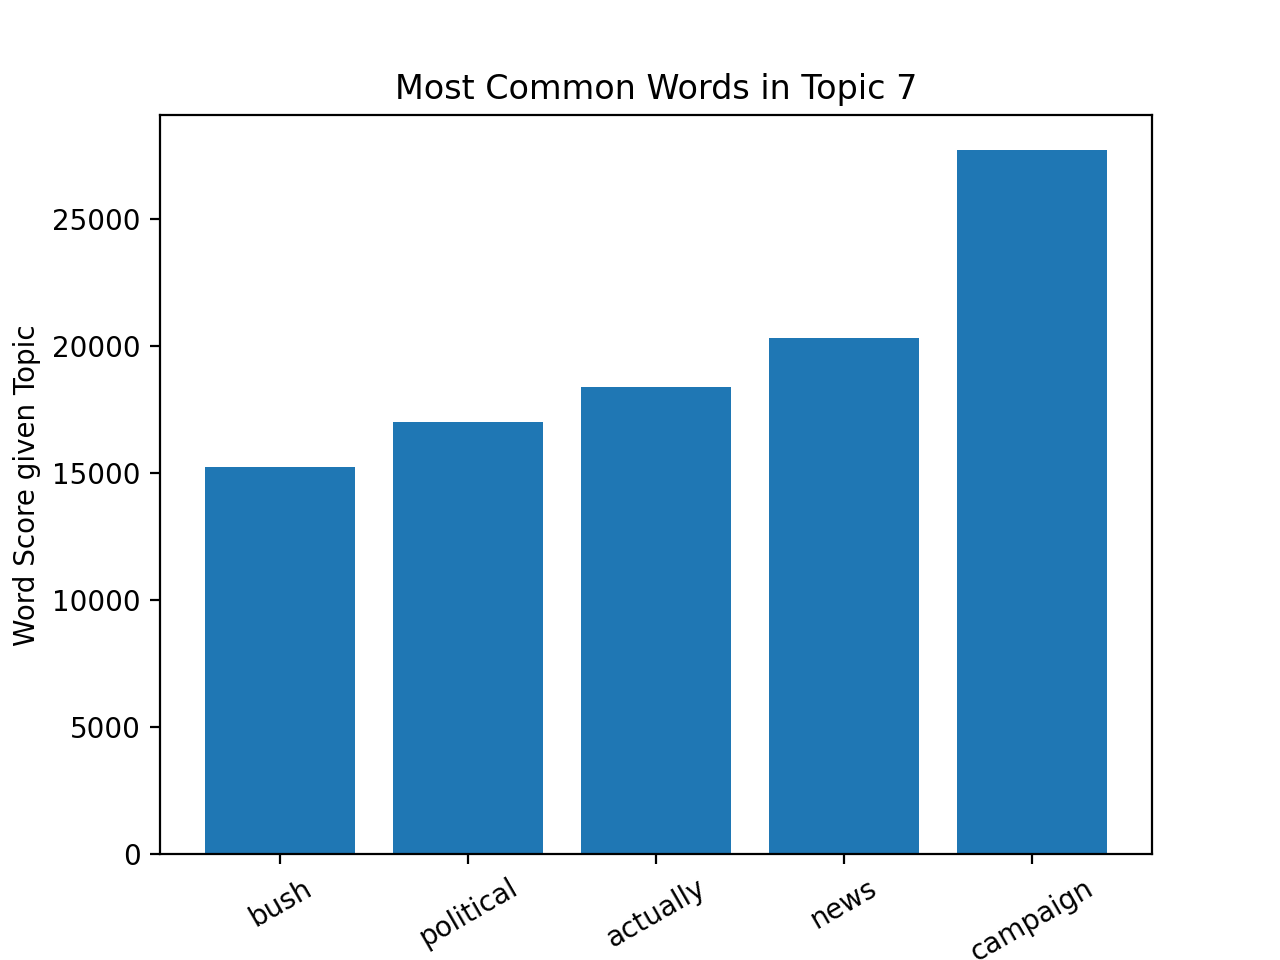

<IPython.core.display.Javascript object>


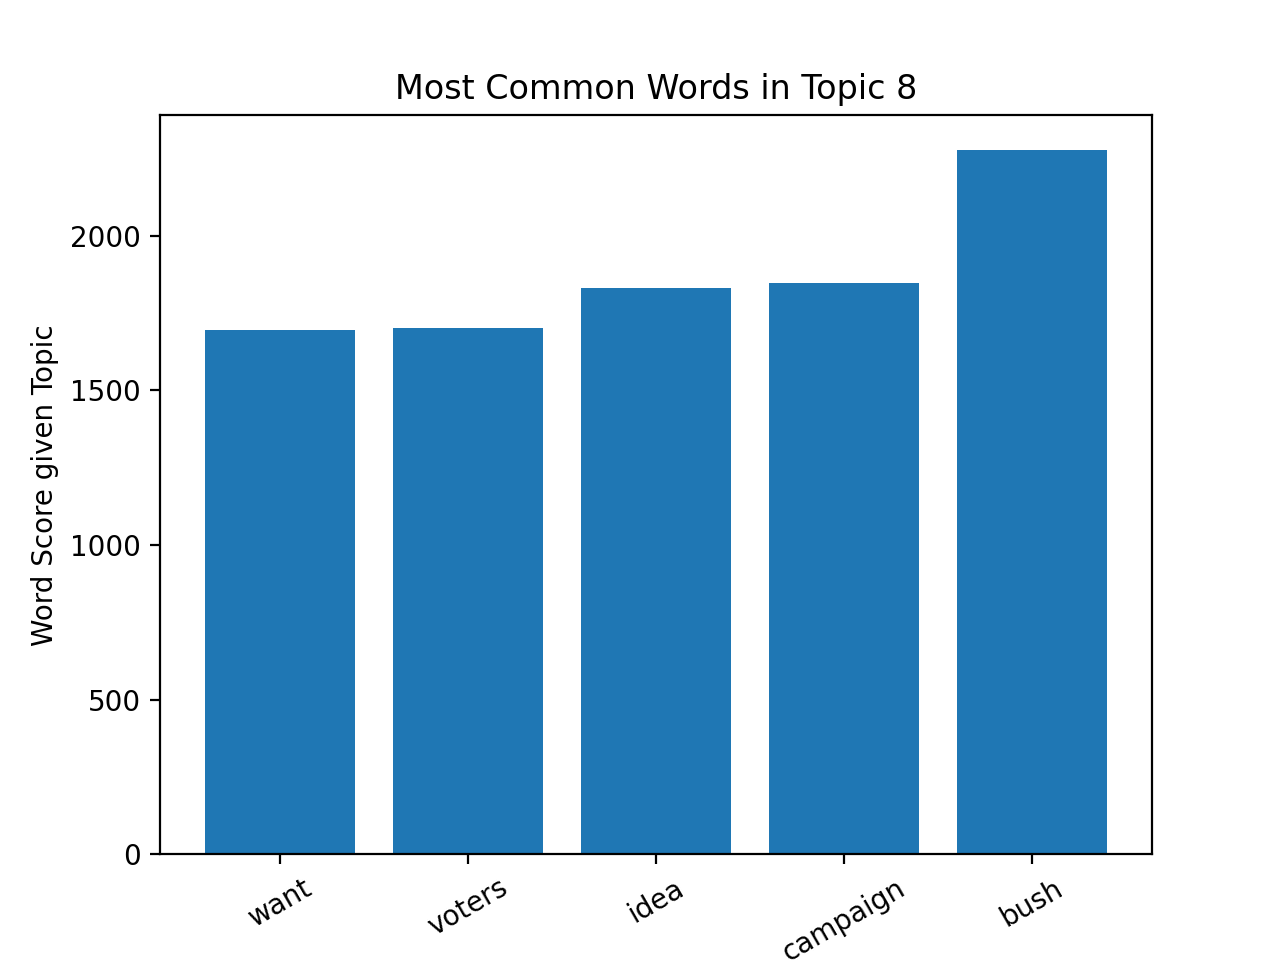

<IPython.core.display.Javascript object>


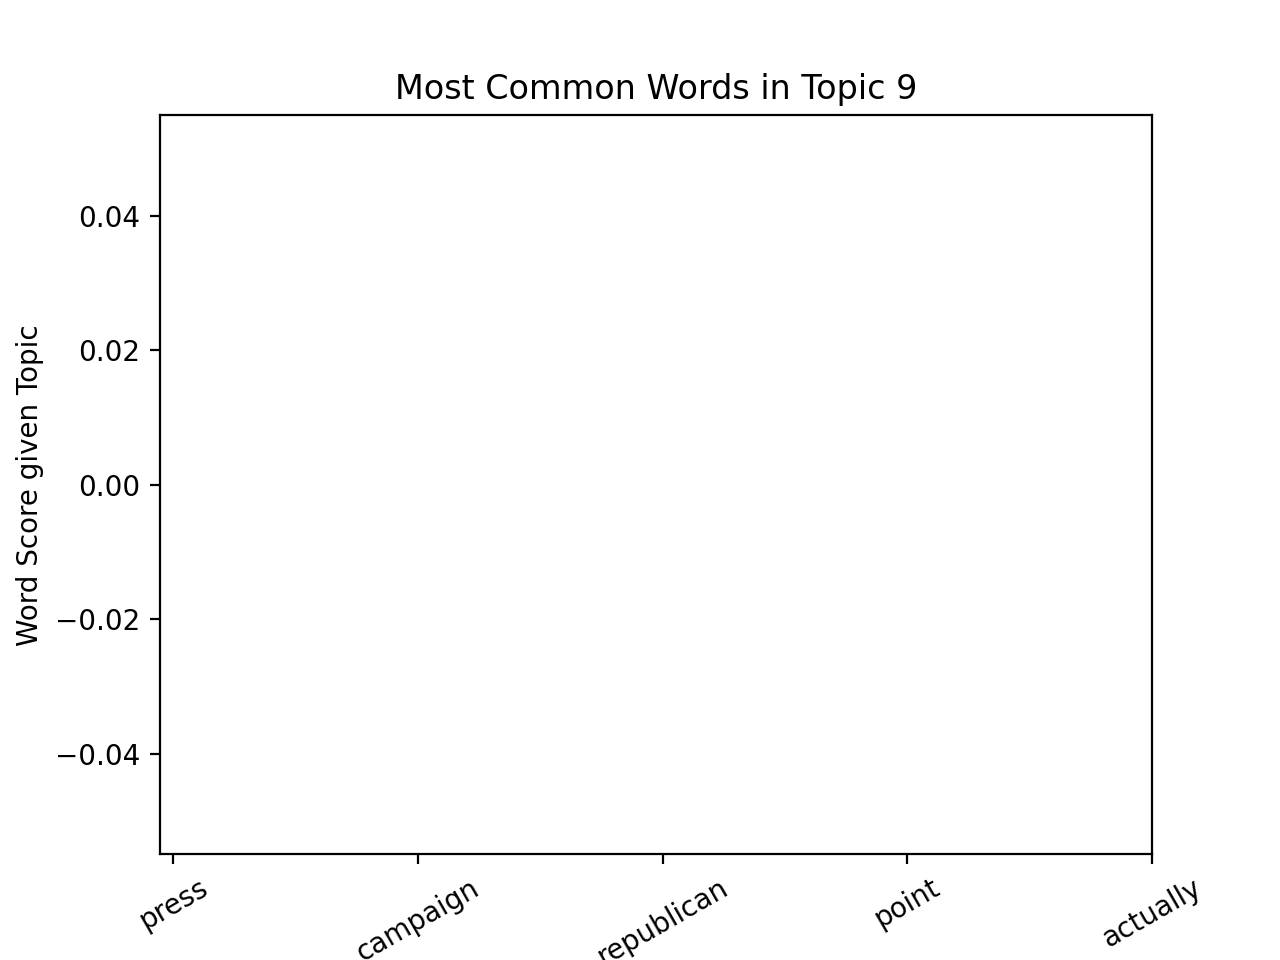

In [13]:
W = len(vocab)
for i in range(model.inference.num_topics):
    topic_words   = np.sort(model.inference.nzw[i]/(model.inference.nz[i]/np.sum(model.inference.nz)))
    topic_indices = np.argsort(model.inference.nzw[i])
    
    fig = plt.figure()
    plt.bar(range(K), topic_words[W-K:W])
    plt.xticks(range(K), list(vocab[topic_indices[W-K:W]]), rotation=30)
    plt.ylabel('Word Score given Topic')
    plt.xlabel('Word')
    plt.title("Most Common Words in Topic " + str(i))
    plt.show()
    

### Visualization 3
Finally, we generate word clouds for the topics. The word size is related to the word score given the topic.

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=K,
                  colormap='tab10',
                  prefer_horizontal=1.0)

In [15]:
topic_dicts = []
for i in range(model.inference.num_topics):
    t_dict = {}
    for j in range(len(vocab)):
        t_dict[vocab[j]] = model.inference.nzw[i][j]/(model.inference.nz[i]/np.sum(model.inference.nz))
        
    topic_dicts.append(t_dict)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [16]:
for i in range(model.inference.num_topics):
    fig = plt.figure()
    plt.gca().imshow(cloud.generate_from_frequencies(topic_dicts[i]))
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: cannot convert float NaN to integer

## Evaluation Questions
* In the introduction, we stated the data for this assignment comes from American political blogs. When do you think these blog posts are from? <br>

<i> Your answer goes here </i>.

* Run the code for one dataset. Which dataset did you choose? Do you see any patterns to describe the different topics? Compare the topics you observe running with 'gibbs_sampling' with 'sum_product'. Are there any salient differences? <br>

<i> Your answer goes here. </i>


#### For the remaining questions, you can answer using only one inference method. Note, Sum Product tends to run faster. 

* Experiment running with a different number of topics. What changes with the different number of topics? How would you go about selecting the number of topics to use in practice? <br> 

<i> Your answer goes here. </i> 

* Now run the visualization code for at least 2 other datasets. Which datasets did you choose? Do you notice different patterns? Can you guess the point of view in the different datasets?

<i> Your answer goes here. </i>

* Which visualizations did you find useful? Which were not useful? What task can you imagine this topic model being used for? Can you identify a short-coming of your current model? 

<i> Your answer goes here. </i>